In [1]:
import pandas as pd
import numpy as np
import re
import string

In [2]:
import spacy

In [3]:
nlp=spacy.load('en_core_web_lg')

In [207]:
df = pd.read_csv('combined1_csv.csv')
df.head()

,data,category
0,Sport pertains to any form of competitive phys...,sports
1,"Sports can, through casual or organized parti...",sports
2,"Hundreds of sports exist, from those between ...",sports
3,"In certain sports such as racing, many contes...",sports
4,"Some sports allow a ""tie"" or ""draw"", in which...",sports


In [208]:
# df.drop('article_link',axis=1,inplace=True)
def clean_text(text):
    text = text.lower()
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
#     emoji = re.compile("["
#                            u"\U0001F600-\U0001FFFF"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
   
#     text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [209]:
new_text=[]
for text in df['data']:  
      new_text.append(clean_text(text))
df['clean_text']=new_text

In [210]:
df['tidy_tweet']=df['clean_text'].str.replace("[^a-zA-Z#]"," ")
df.head(10)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,data,category,clean_text,tidy_tweet
0,Sport pertains to any form of competitive phys...,sports,sport pertains to any form of competitive phys...,sport pertains to any form of competitive phys...
1,"Sports can, through casual or organized parti...",sports,sports can through casual or organized partici...,sports can through casual or organized partici...
2,"Hundreds of sports exist, from those between ...",sports,hundreds of sports exist from those between si...,hundreds of sports exist from those between si...
3,"In certain sports such as racing, many contes...",sports,in certain sports such as racing many contesta...,in certain sports such as racing many contesta...
4,"Some sports allow a ""tie"" or ""draw"", in which...",sports,some sports allow a tie or draw in which there...,some sports allow a tie or draw in which there...
5,A number of contests may be arranged in a tou...,sports,a number of contests may be arranged in a tour...,a number of contests may be arranged in a tour...
6,Many sports leagues make an annual champion b...,sports,many sports leagues make an annual champion by...,many sports leagues make an annual champion by...
7,Sport is generally recognised as system of act...,sports,sport is generally recognised as system of act...,sport is generally recognised as system of act...
8,"Other organisations, such as the Council of E...",sports,other organisations such as the council of eur...,other organisations such as the council of eur...
9,"However, a number of competitive, but non-phy...",sports,however a number of competitive but nonphysica...,however a number of competitive but nonphysica...


In [211]:
df['tidy_tweet']=df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [212]:
df.head(10)

,data,category,clean_text,tidy_tweet
0,Sport pertains to any form of competitive phys...,sports,sport pertains to any form of competitive phys...,sport pertains form competitive physical activ...
1,"Sports can, through casual or organized parti...",sports,sports can through casual or organized partici...,sports through casual organized participation ...
2,"Hundreds of sports exist, from those between ...",sports,hundreds of sports exist from those between si...,hundreds sports exist from those between singl...
3,"In certain sports such as racing, many contes...",sports,in certain sports such as racing many contesta...,certain sports such racing many contestants co...
4,"Some sports allow a ""tie"" or ""draw"", in which...",sports,some sports allow a tie or draw in which there...,some sports allow draw which there single winn...
5,A number of contests may be arranged in a tou...,sports,a number of contests may be arranged in a tour...,number contests arranged tournament producing ...
6,Many sports leagues make an annual champion b...,sports,many sports leagues make an annual champion by...,many sports leagues make annual champion arran...
7,Sport is generally recognised as system of act...,sports,sport is generally recognised as system of act...,sport generally recognised system activities b...
8,"Other organisations, such as the Council of E...",sports,other organisations such as the council of eur...,other organisations such council europe preclu...
9,"However, a number of competitive, but non-phy...",sports,however a number of competitive but nonphysica...,however number competitive nonphysical activit...


In [213]:
df[1252:1253]

,data,category,clean_text,tidy_tweet
1252,"Deaf basketball - One of several deaf sports, ...",sports,deaf basketball one of several deaf sports de...,deaf basketball several deaf sports deaf baske...


In [214]:
df['tidy_tweet'][4252]

'youth have safe place after school hours they will likely into trouble receive poor grades drop school drugs alcohol'

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        5434 non-null   object
 1   category    5434 non-null   object
 2   clean_text  5434 non-null   object
 3   tidy_tweet  5434 non-null   object
dtypes: object(4)
memory usage: 169.9+ KB


In [216]:
df.isnull().sum()

data          0
category      0
clean_text    0
tidy_tweet    0
dtype: int64

In [217]:
df.dropna(inplace=True)

In [218]:
blancks = []
for i,qn,x,y,b in df.itertuples():
    if type(b) == str:
        if b.isspace() or b=='':
            blancks.append(i)
blancks

[]

In [219]:
df.drop(blancks,inplace=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5434 entries, 0 to 5433
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        5434 non-null   object
 1   category    5434 non-null   object
 2   clean_text  5434 non-null   object
 3   tidy_tweet  5434 non-null   object
dtypes: object(4)
memory usage: 341.3+ KB


In [221]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [222]:
dtm = tfidf.fit_transform(df['tidy_tweet'])

In [223]:
dtm

<5434x6091 sparse matrix of type '<class 'numpy.float64'>'
	with 54898 stored elements in Compressed Sparse Row format>

In [224]:
from sklearn.decomposition import NMF

In [225]:
nmf_model = NMF(n_components=3,random_state=42)

In [226]:
nmf_model.fit(dtm)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


NMF(n_components=3, random_state=42)

In [227]:
for i, arr in enumerate(nmf_model.components_):
    print(f"The words of NMF of high frequency of {i} is")
    print([tfidf.get_feature_names()[i] for i in arr.argsort()[-25:]])
#     print(arr[4])
    print('\n')

The words of NMF of high frequency of 0 is
['world', 'international', 'england', 'popular', 'league', 'australian', 'teams', 'century', 'sports', 'play', 'cricket', 'sport', 'known', 'association', 'team', 'hockey', 'rugby', 'basketball', 'players', 'games', 'rules', 'ball', 'played', 'game', 'football']


The words of NMF of high frequency of 1 is
['cabinet', 'term', 'house', 'union', 'office', 'power', 'constitution', 'parliamentary', 'ministers', 'executive', 'republics', 'india', 'title', 'elected', 'council', 'parliament', 'state', 'republic', 'united', 'head', 'minister', 'prime', 'government', 'states', 'president']


The words of NMF of high frequency of 2 is
['forms', 'military', 'term', 'group', 'terrorist', 'according', 'attacks', 'politics', 'international', 'policy', 'people', 'used', 'health', 'islamic', 'groups', 'social', 'public', 'world', 'state', 'governance', 'alqaeda', 'terrorism', 'jihad', 'political', 'violence']




In [228]:
topic_sel = nmf_model.transform(dtm)

In [229]:
topic_sel[0]

array([0.03414563, 0.        , 0.02181988])

In [230]:
g_df = []
for j in range(0,3):
    op= []
    for i,data,cat,ct,tt in df.itertuples():
        if(topic_sel[i].argmax()==j):
            op.append(topic_sel[i].max())
    g_df.append(op)
# g_df[0]
# g_df

In [231]:
import matplotlib.pyplot as plt

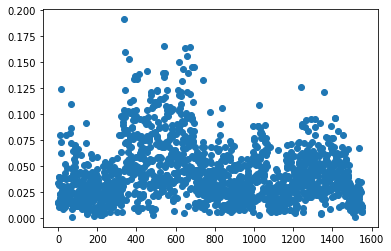

In [232]:
x =range(0,len(g_df[0]))
y = g_df[0]
plt.scatter(x,y)
plt.show()

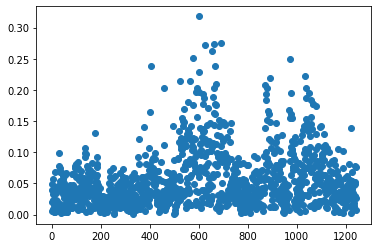

In [233]:
x =range(0,len(g_df[1]))
y = g_df[1]
plt.scatter(x,y)
plt.show()

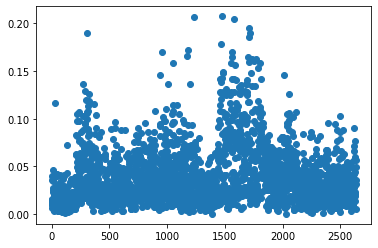

In [234]:
x =range(0,len(g_df[2]))
y = g_df[2]
plt.scatter(x,y)
plt.show()

In [235]:
df[3938:3942]

,data,category,clean_text,tidy_tweet
3938,"Since the rise of the state some 5,000 years ...",terrorism,since the rise of the state some 5000 years ag...,since rise state some years military activity ...
3939,The advent of gunpowder and the acceleration ...,terrorism,the advent of gunpowder and the acceleration o...,advent gunpowder acceleration technological ad...
3940,"Henderson, ""One source claims that 14,500 war...",terrorism,henderson one source claims that 14500 wars ha...,henderson source claims that wars have taken p...
3941,"5 billion lives, leaving only 300 years of pea...",terrorism,5 billion lives leaving only 300 years of peac...,billion lives leaving only years peace beer


In [236]:
vals={0:'sports',1:'politics',2:'terrorism'}

In [237]:
df['topic']=topic_sel.argmax(axis=1)

In [238]:
df.head()

,data,category,clean_text,tidy_tweet,topic
0,Sport pertains to any form of competitive phys...,sports,sport pertains to any form of competitive phys...,sport pertains form competitive physical activ...,0
1,"Sports can, through casual or organized parti...",sports,sports can through casual or organized partici...,sports through casual organized participation ...,2
2,"Hundreds of sports exist, from those between ...",sports,hundreds of sports exist from those between si...,hundreds sports exist from those between singl...,0
3,"In certain sports such as racing, many contes...",sports,in certain sports such as racing many contesta...,certain sports such racing many contestants co...,0
4,"Some sports allow a ""tie"" or ""draw"", in which...",sports,some sports allow a tie or draw in which there...,some sports allow draw which there single winn...,0


In [239]:
df['category_decided']=df['topic'].map(vals)

In [240]:
df.shape

(5434, 6)

In [241]:
# val=0
# for i,data,cat,ct,tt,t,cd in df.itertuples():
#     if(val<=100):
#         if(cat=='politics'):
#             if(cd=="terrorism"):
#                 df.drop(i,inplace= True)
#                 val+=1

In [242]:
df.shape

(5434, 6)

In [243]:
df

,data,category,clean_text,tidy_tweet,topic,category_decided
0,Sport pertains to any form of competitive phys...,sports,sport pertains to any form of competitive phys...,sport pertains form competitive physical activ...,0,sports
1,"Sports can, through casual or organized parti...",sports,sports can through casual or organized partici...,sports through casual organized participation ...,2,terrorism
2,"Hundreds of sports exist, from those between ...",sports,hundreds of sports exist from those between si...,hundreds sports exist from those between singl...,0,sports
3,"In certain sports such as racing, many contes...",sports,in certain sports such as racing many contesta...,certain sports such racing many contestants co...,0,sports
4,"Some sports allow a ""tie"" or ""draw"", in which...",sports,some sports allow a tie or draw in which there...,some sports allow draw which there single winn...,0,sports
...,...,...,...,...,...,...
5429,In mid-2014 after the Islamic State of Iraq an...,terrorism,in mid2014 after the islamic state of iraq and...,after islamic state iraq levant declared that ...,2,terrorism
5430,""" The speech included a religious refutation o...",terrorism,the speech included a religious refutation of...,speech included religious refutation alqaeda b...,2,terrorism
5431,""" He also recalled a past instance in which Os...",terrorism,he also recalled a past instance in which osa...,also recalled past instance which osama laden ...,2,terrorism
5432,Zawahiri was encouraging factionalism and div...,terrorism,zawahiri was encouraging factionalism and divi...,zawahiri encouraging factionalism division bet...,2,terrorism


In [244]:
print(accuracy_score(df['category'],df['category_decided']))

0.7782480677217519


In [245]:
print(classification_report(df['category'],df['category_decided']))

              precision    recall  f1-score   support

    politics       0.83      0.57      0.68      1801
      sports       0.96      0.84      0.89      1784
   terrorism       0.65      0.92      0.76      1849

    accuracy                           0.78      5434
   macro avg       0.81      0.78      0.78      5434
weighted avg       0.81      0.78      0.78      5434



In [246]:
print(confusion_matrix(df['category'],df['category_decided']))

[[1035   43  723]
 [  82 1491  211]
 [ 126   20 1703]]


In [247]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['data'],df['category_decided'],test_size=0.33,random_state=42)

In [248]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer()

In [249]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()

In [250]:
from sklearn.pipeline import Pipeline
rt = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('lin_svc',LinearSVC())])

In [251]:
rt.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('lin_svc', LinearSVC())])

In [252]:
op = rt.predict(x_test)

In [253]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [254]:
accuracy_score(op,y_test)

0.9063545150501672

In [255]:
rt.predict(["hi i love to play football."])

array(['sports'], dtype=object)